In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,14)
# ylim=(-14, 10)
alpha=1
marker='o'
s=10
legend=False
linewidth=0
plt.rcParams["figure.figsize"] = (20,20)

In [3]:
WT__Dpf_3_null_small_RNA = pd.read_csv("/tungstenfs/scratch/ggrossha/gypafoiv/projects/GROUP_PROJECTS/rajani/small_RNAs_Rajani/01_small_RNA_seq_15_C/results/filter/DE_htseq_count__alignment_sorted_filtered_unique_mappers__reverse__WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv",
                                       header=0,
                                       sep="\t")
WT__Dpf_3_null_small_RNA.set_index(["id", "taxonomy_id", "gene_name", "sequence", "status", "gene_biotype"], inplace=True)
WT__Dpf_3_null_small_RNA.columns = WT__Dpf_3_null_small_RNA.columns + "_small_RNA"

WT__Dpf_3_null_total_RNA = pd.read_csv("/tungstenfs/scratch/ggrossha/gypafoiv/projects/GROUP_PROJECTS/rajani/small_RNAs_Rajani/02_total_RNAseq_15_C/results/filter/DE_htseq_count_alignment_unique_mappers__reverse__WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv",
                                       header=0,
                                       sep="\t")
WT__Dpf_3_null_total_RNA.set_index(["id", "taxonomy_id", "gene_name", "sequence", "status", "gene_biotype"], inplace=True)
WT__Dpf_3_null_total_RNA.columns = WT__Dpf_3_null_total_RNA.columns + "_total_RNA"

WT__Dpf_3_null = pd.merge(WT__Dpf_3_null_small_RNA, WT__Dpf_3_null_total_RNA, 
                          on=["id", "taxonomy_id", "gene_name", "sequence", "status", "gene_biotype"], 
                          how="outer")


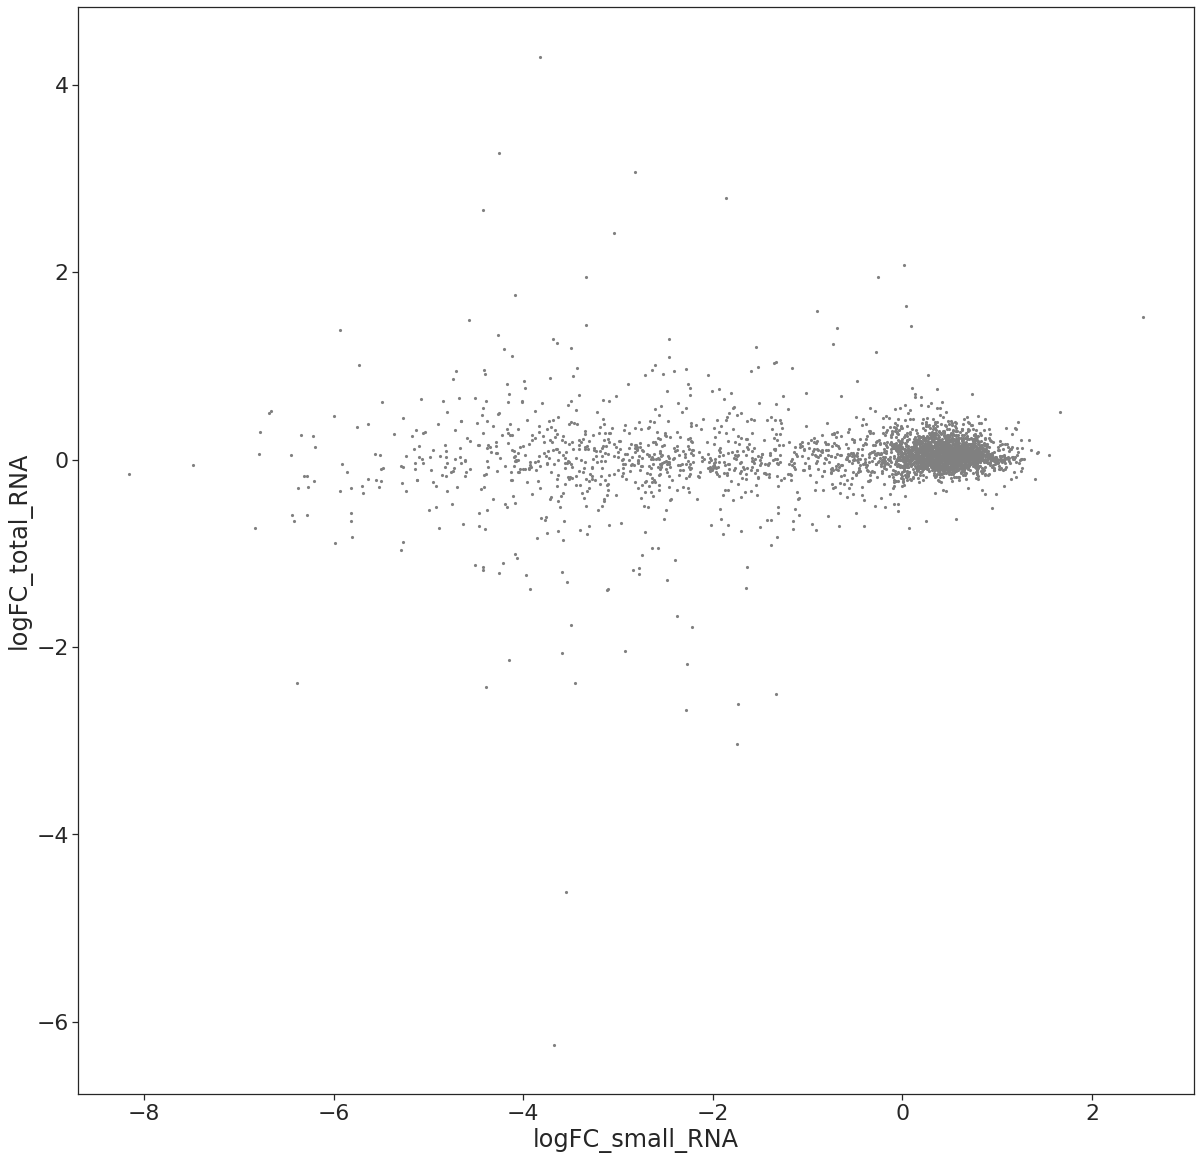

In [4]:
sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__Dpf_3_null,
                           s=s,
                           color="gray",
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

In [5]:
WT__Dpf_3_null["FDR_small_RNA"].fillna(1, inplace=True)
WT__Dpf_3_null["FDR_total_RNA"].fillna(1, inplace=True)
WT__Dpf_3_null.fillna(0, inplace=True)

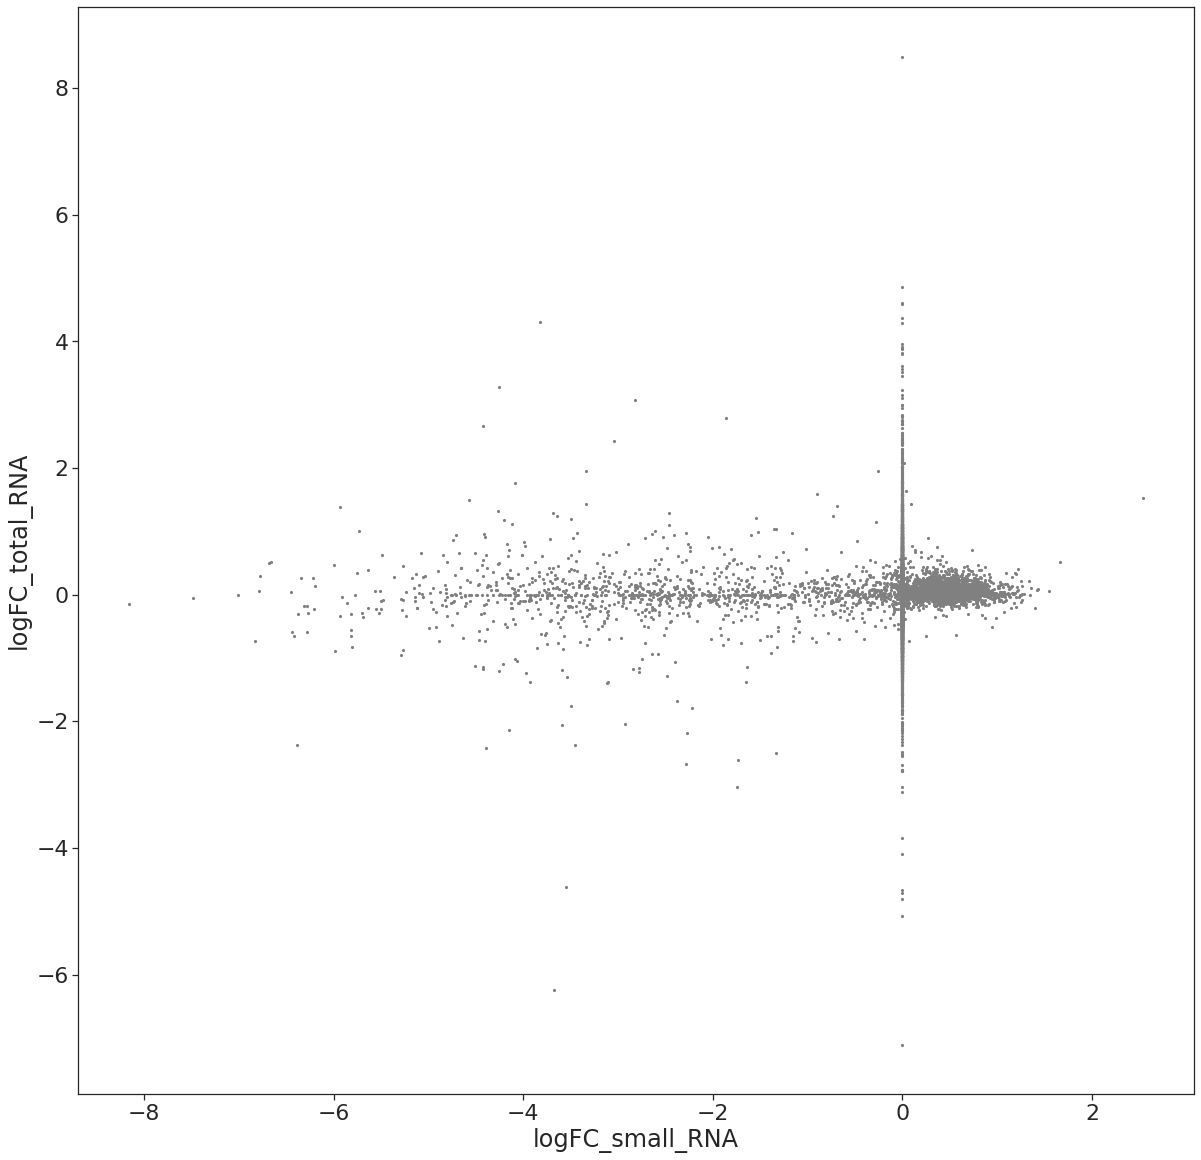

In [6]:
sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__Dpf_3_null,
                           s=s,
                           color="gray",
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

In [7]:
WT__Dpf_3_null["Significant"] = "No"
WT__Dpf_3_null.loc[WT__Dpf_3_null["FDR_small_RNA"]<0.05, "Significant"] = "small_RNA"
WT__Dpf_3_null.loc[WT__Dpf_3_null["FDR_total_RNA"]<0.05, "Significant"] = "total_RNA"
WT__Dpf_3_null.loc[((WT__Dpf_3_null["FDR_small_RNA"]<0.05) & (WT__Dpf_3_null["FDR_total_RNA"]<0.05)), "Significant"] = "both"

/tungstenfs/nobackup/ggrossha/gypafoiv/miniconda3/envs/python_3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2848: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


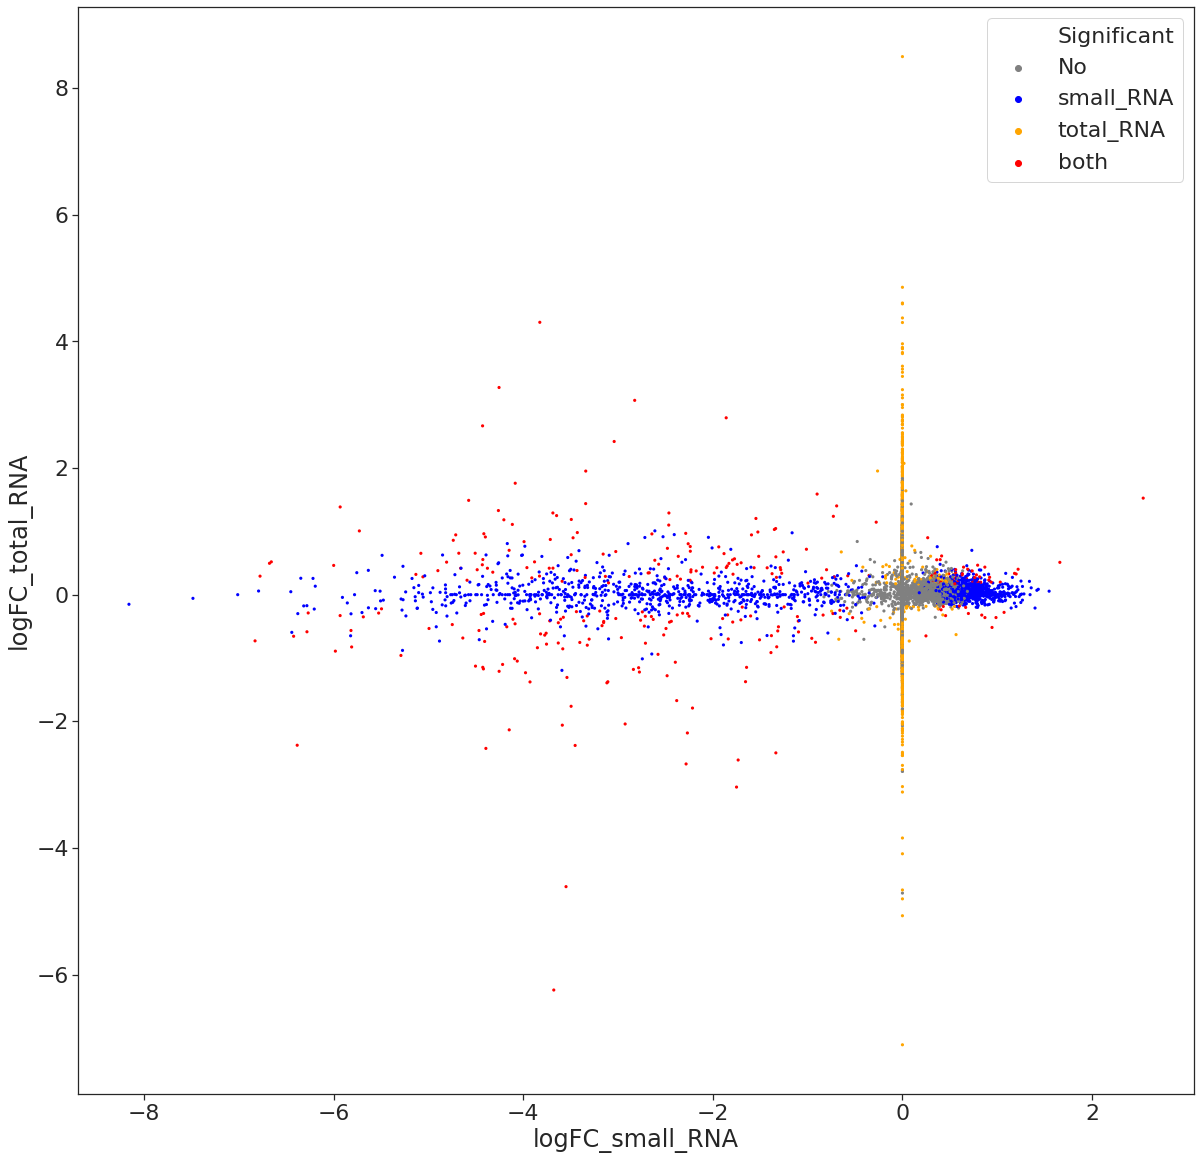

In [8]:
sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__Dpf_3_null,
                           s=s,
                           hue="Significant",
                           hue_order=["No", "small_RNA", "total_RNA", "both"],
                           palette=["gray", "blue", "orange", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

In [9]:
WT__Dpf_3_null["Significant"].value_counts()

No           10263
total_RNA     2939
small_RNA     1680
both           310
Name: Significant, dtype: int64

# Mut-2

In [10]:
WT__mut_2_small_RNA = pd.read_csv("/tungstenfs/scratch/ggrossha/gypafoiv/projects/GROUP_PROJECTS/rajani/small_RNAs_Rajani/01_small_RNA_seq_15_C/results/filter/DE_htseq_count__alignment_sorted_filtered_unique_mappers__reverse__WT__mut_2/DE_edgeR/final_table_with_gene_info.tsv",
                                  header=0,
                                  sep="\t")
WT__mut_2_small_RNA.set_index(["id", "taxonomy_id", "gene_name", "sequence", "status", "gene_biotype"], inplace=True)
WT__mut_2_small_RNA.columns = WT__mut_2_small_RNA.columns + "_small_RNA"

WT__mut_2_total_RNA = pd.read_csv("/tungstenfs/scratch/ggrossha/gypafoiv/projects/GROUP_PROJECTS/rajani/small_RNAs_Rajani/02_total_RNAseq_15_C/results/filter/DE_htseq_count_alignment_unique_mappers__reverse__WT__mut_2/DE_edgeR/final_table_with_gene_info.tsv",
                                  header=0,
                                  sep="\t")
WT__mut_2_total_RNA.set_index(["id", "taxonomy_id", "gene_name", "sequence", "status", "gene_biotype"], inplace=True)
WT__mut_2_total_RNA.columns = WT__mut_2_total_RNA.columns + "_total_RNA"

WT__mut_2 = pd.merge(WT__mut_2_small_RNA, WT__mut_2_total_RNA, 
                          on=["id", "taxonomy_id", "gene_name", "sequence", "status", "gene_biotype"], 
                          how="outer")


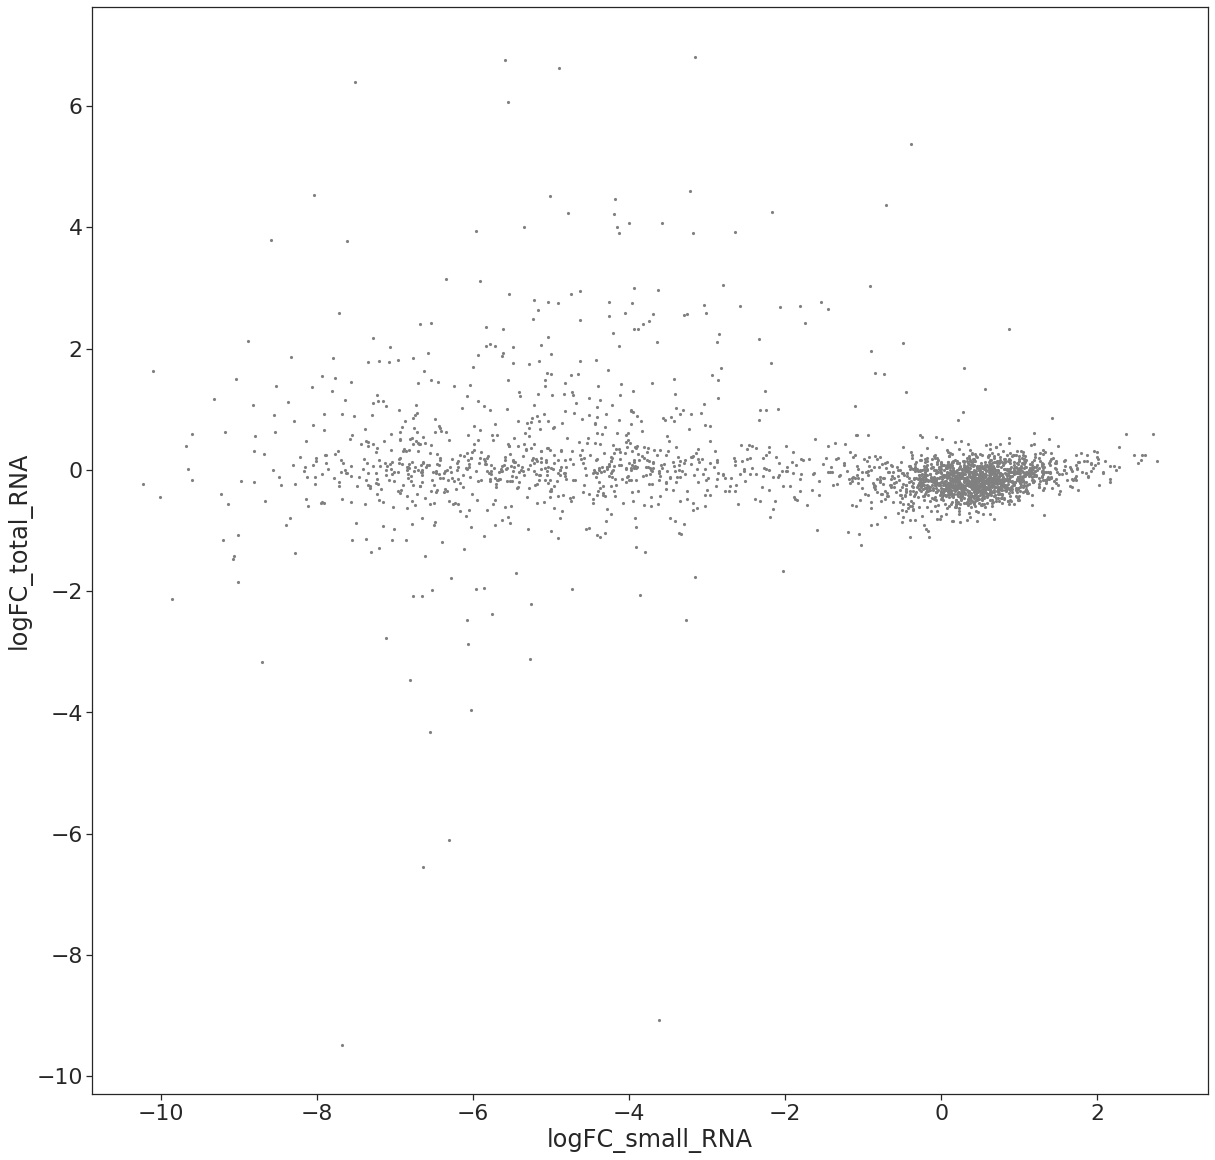

In [11]:
sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__mut_2,
                           s=s,
                           color="gray",
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

In [12]:
WT__mut_2["FDR_small_RNA"].fillna(1, inplace=True)
WT__mut_2["FDR_total_RNA"].fillna(1, inplace=True)
WT__mut_2.fillna(0, inplace=True)

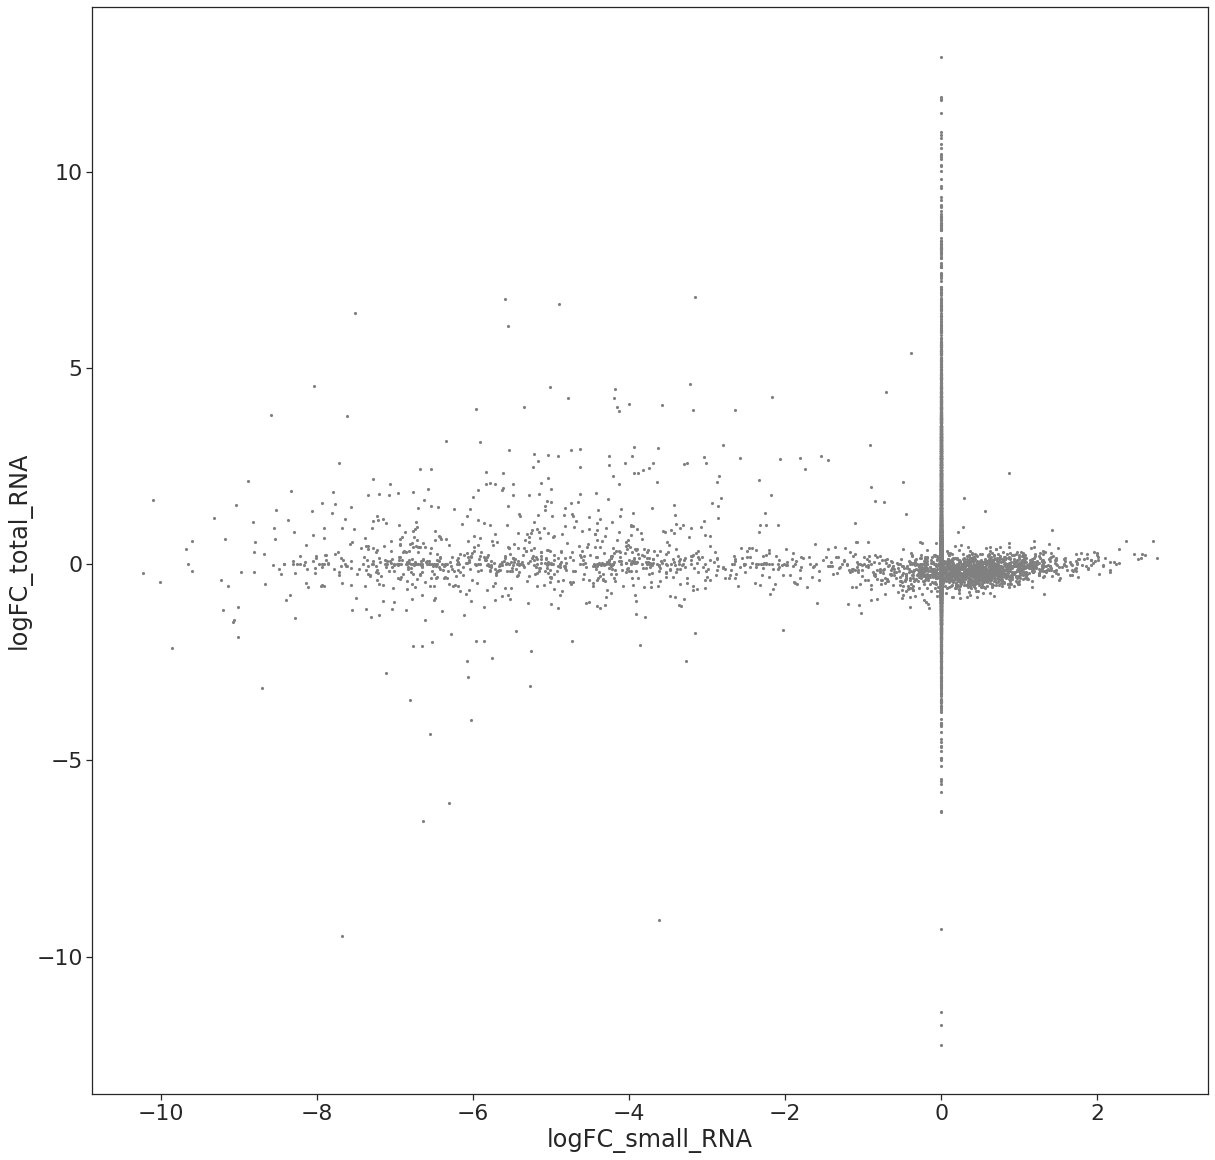

In [13]:
sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__mut_2,
                           s=s,
                           color="gray",
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

In [14]:
WT__mut_2["Significant"] = "No"
WT__mut_2.loc[WT__mut_2["FDR_small_RNA"]<0.05, "Significant"] = "small_RNA"
WT__mut_2.loc[WT__mut_2["FDR_total_RNA"]<0.05, "Significant"] = "total_RNA"
WT__mut_2.loc[((WT__mut_2["FDR_small_RNA"]<0.05) & (WT__mut_2["FDR_total_RNA"]<0.05)), "Significant"] = "both"

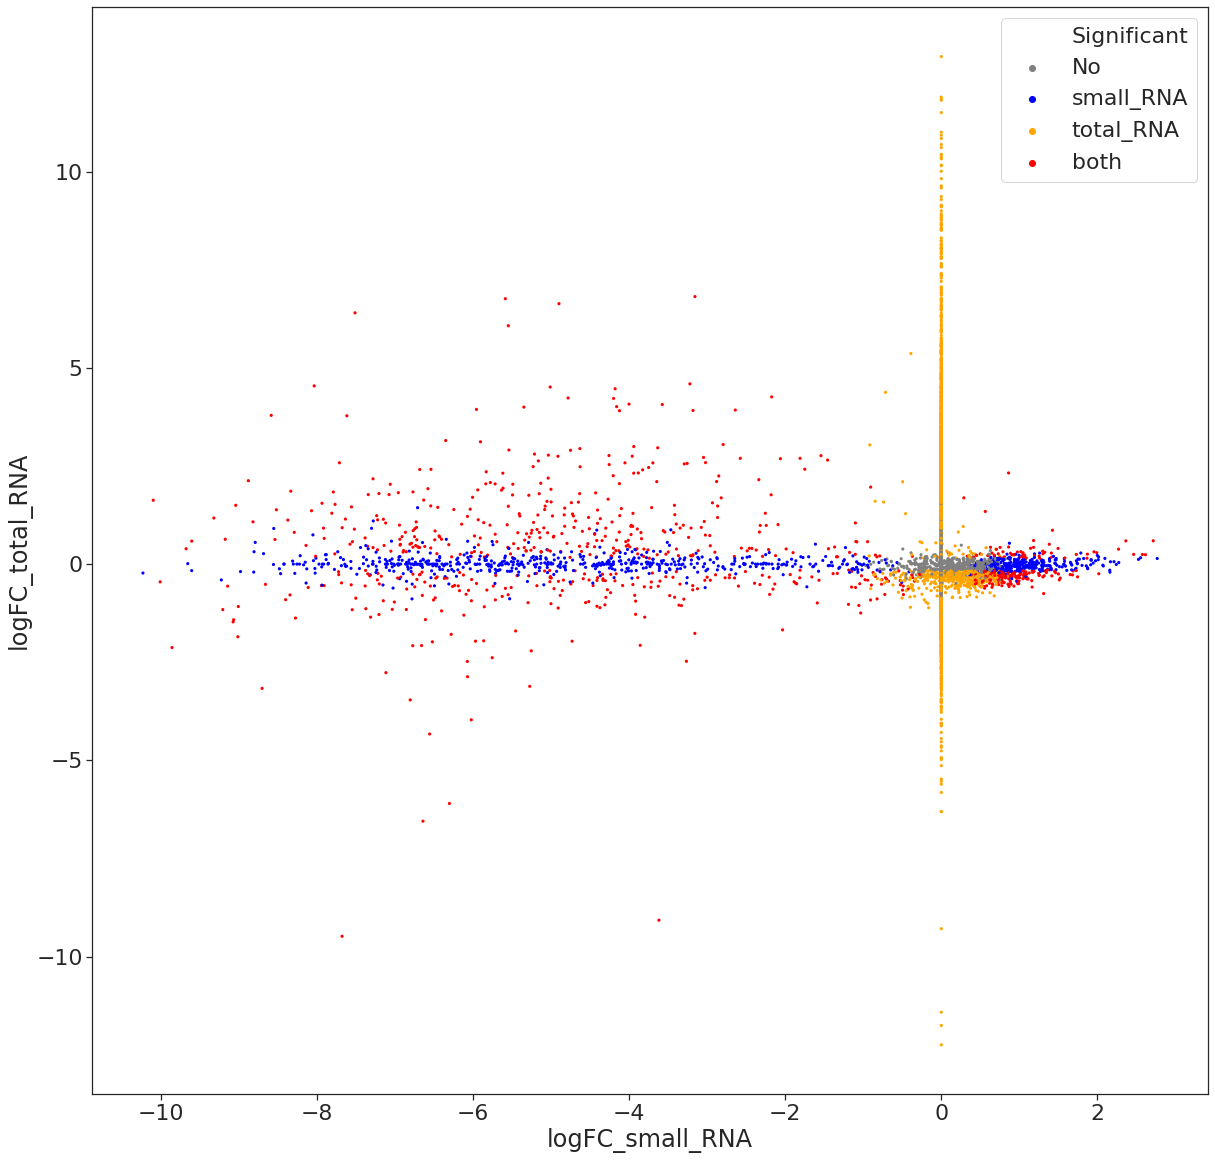

In [15]:
sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__mut_2,
                           s=s,
                           hue="Significant",
                           hue_order=["No", "small_RNA", "total_RNA", "both"],
                           palette=["gray", "blue", "orange", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

In [16]:
WT__mut_2["Significant"].value_counts()

total_RNA    7588
No           6555
small_RNA     891
both          816
Name: Significant, dtype: int64